# 1- Implementation a Neural Network
In this problem you should train an artificial neural network (MLP and RBF) for classification of the given dataset.<br>
you should fill the missing sections to complete your neural network implementation.<br>
in this exercise you will:
- Tune the learning rate and regularization weight
- Implement the loss function for MLP
- Implement the forward pass and backward pass 
- visualize the train and validation accuracy versuse iteration


In [6]:
# initialization

import numpy as np
import matplotlib.pyplot as plt

from neural_net import MLPNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1-1-1 Create a toy dataset
In this section we create a toy dataset containing 5 samples with 5 features.
The network has 6 neurons in the hidden layer and there are 3 classes in the output.
MLPNet class in the file neural_net.py will be used to instantiate our network . We use toy dataset with small size to check your implementaion and to see what happens to network weights during training.

In [7]:
# Create our network and toy dataset

features = 5
hidden_size = 6
classes = 3
inputs = 5
np.random.seed(0)

net = MLPNet(features, hidden_size, classes, std=1e-1)
X = 10 * np.random.randn(inputs, features)
y = np.array([1, 0, 0, 2, 1])

## 1-1-2- Forward pass
To run the following section, you should complete the loss function in the neural_net.py to compute scores . The output is a 5*3 matrix that contains the class score for each sample.

In [8]:
scores = net.loss(X)
for x in scores:
    print(x)
# print ('Your scores:\n',scores)

[array([-4.76888184, -0.31012331, -2.96622082, -3.65421661, -4.83108851,
        0.41385497]), array([ 0.53925742, -1.13732454,  1.33071509])]
[array([-1.07613449, -0.91277243, -1.11847698, -2.52745982, -1.04787432,
        1.42001821]), array([ 0.21951616, -0.26072075,  0.64730221])]
[array([-3.93358834e+00,  1.20895816e+00, -1.14667739e-03, -1.87757461e+00,
       -3.79877740e+00, -6.97610940e-01]), array([ 0.43493318, -0.6477387 ,  0.77415062])]
[array([-2.64241309, -0.04723502,  2.29682815, -5.08178134, -4.4985277 ,
        3.91738197]), array([ 1.00057299, -0.65759463,  1.40035202])]
[array([ 1.63023669, -2.04948118, -0.84690739, -1.89752301,  1.26031623,
        2.39110826]), array([0.06459671, 0.17639074, 0.24715522])]


## 1-1-3- Forward pass
Now you should complete the second missing part in loss function in the neural_net.py , the output shows the loss of your network

In [11]:
loss, _ = net.loss(X, y, reg=0.1)
print("your network loss is:",loss)

your network loss is: 8.272024469347615


## 1-1-4- Backward pass
compute the gradient according to weights and biases. 

In [5]:
loss, grads = net.loss(X, y, reg=0.1)
print('grads of W1\n',grads['W1'])
print('grads of b1\n',grads['b1'])
print('grads of W2\n',grads['W2'])
print('grads of b2\n',grads['b2'])

grads of W1
 [[ 0.17640523  0.22942447  0.66109806  0.22408932  0.1867558   0.25865156]
 [ 0.09500884  0.09317889 -0.06820969  0.04105985  0.01440436 -0.10398094]
 [ 0.07610377  0.21296437  0.17547307  0.03336743  0.14940791 -0.73599965]
 [ 0.03130677  0.0219531   0.27657643  0.06536186  0.08644362  1.09845379]
 [ 0.22697546  0.09736913 -0.14641344 -0.01871839  0.15327792 -0.67865894]]
grads of b1
 [ 2.77555756e-17 -2.98600272e-02 -3.26264229e-02  0.00000000e+00
  1.38777878e-17 -3.31687229e-02]
grads of W2
 [[ 0.28246045 -0.17836046 -0.86385768]
 [-0.37237654  0.2369792  -0.13381036]
 [ 0.22133831  0.23254171 -0.79859869]
 [-0.15516534  0.14676478 -0.74149844]
 [-0.08902525  0.02795395 -0.67956198]
 [ 0.31154711 -0.44235123  0.02352774]]
grads of b2
 [-0.06986028 -0.13260449  0.31329198]


## 1-1-5- Train the network
Fill the missing section in train and predict function of MLPNet class . After you correctly implement those function you build a two layer neural network that can feed data to it. The result of the following section shows Final training loss of your network and training loss versus iteration .

iteration 0 / 100: loss 6.616247
Final training loss:  nan


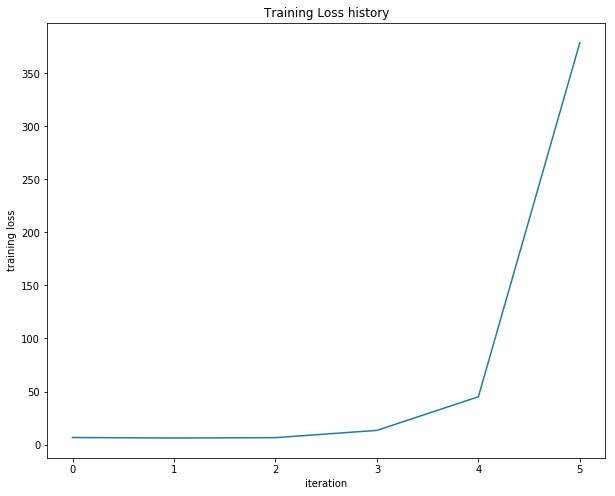

In [23]:
net = MLPNet(features, hidden_size, classes, std=1e-1)
stats = net.train(X, y, X, y,
            alpha=1e-1, reg=1e-5,
            num_iters=100)

print ('Final training loss: ', stats['loss_train'][-1])

# plot the loss history
plt.plot(stats['loss_train'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## 1-1-6- Load data MNIST
In this section we use a real dataset.change root variable in dataloader.py to your dataset path.

In [24]:
from dataloader import select_features
import numpy as np
import os
from scipy.misc import imread
import cv2
import matplotlib.pyplot as plt
import matplotlib
val_num = 1000
train_num = 49000
test_num = 10000
train_data, train_labels, test_data, test_labels,\
    class_names, n_train, n_test, n_class, n_features = select_features()


# Subsample the data
mask = range(train_num, n_train)
X_val = train_data[mask]
y_val = train_labels[mask]
mask = range(train_num)
X_train = train_data[mask]
y_train = train_labels[mask]
mask = range(test_num)
X_test = test_data[mask]
y_test = test_labels[mask]

# # Normalize the data: subtract the mean image
# mean_image = np.mean(X_train, axis=0)
# X_train -= mean_image
# X_val -= mean_image
# X_test -= mean_image

print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 784)
Train labels shape:  (49000,)
Validation data shape:  (11000, 784)
Validation labels shape:  (11000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


## 1-1-7- Train 
For training our neural network we will use SGD(Stochastic Gradient descent).The loss of your network must decrease during epochs.

In [ ]:
input_size = n_features
print(input_size)
hidden_size = 500
num_classes = 10
net = MLPNet(input_size, hidden_size, num_classes,std=1e-2)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=30000, batch_size=200,
            alpha=1e-4, alpha_decay=0.95,
            reg=0.5)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print ('Validation accuracy: ', val_acc)


the below plots show loss during epochs and training and validatino accuracy versus epochs. The loss should decreas over time. ***according to second plot what is the best iteration number to terminate training?***

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_train'])
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc'], label='train')
plt.plot(stats['val_acc'], label='val')
plt.title('Classification accuracy ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## 1-1-8- Tune network's hyperparameters
As you know hidden layer size, learning rate and weight regularization are important in developing a neural network so you should tune them and get a better result and report the best hyperparameters.

In [ ]:
best_net = None # store the best model into this 
#################################################################################
# Tune hyperparameters with validation set and store your best model in best_net#
#################################################################################
pass
#################################################################################
#                                END OF YOUR CODE                               #
#################################################################################


## 1-1-9- Test
Now you find the best hyperparameters, Let's test your network on test dataset and evaluate your accuracy.
**our baseline is 47% and for each 1% you get 1 extra bonus point**

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print ('Test accuracy: ', test_acc)

## 1-2-1- Scikit-learn without normalization
In this section you become familiar with Scikit-learn and implement an MLP network with that. Find the best parameters for best accuracy

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier


## 1-2-2- Test acc
test your network with test dataset and report accuracy

## 1-2-3- Scikit-learn with normalization
In this section we use previous code with just one change. befor you feed data to network normalized them . 

## 1-2-4- Test accuracy
Test again your network with test dataset.Do you see any progress in test accuracy against result of prevouis section?